In [1]:
from src.final_product import PlantForecast
import src.graphing_tools as gtools

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import os
import time
import gdal

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [2]:
import sampyl as smp
from sampyl import np

In [3]:
pf = PlantForecast()

In [4]:
pf.load_metadata()
pf.load_ndvi(preloaded=True)
pf.load_weather(preloaded=True)
pf.merge_modis_weather(longterm=365)

Preloading from path: preloaded_data/2000_2017_ndvi.csv
Preloading from path: preloaded_data/2000_2017_weather.csv


In [5]:
train_df, test_df=pf.train_test_split_by_year(test_years=[2015,2016,2017],train_years=list(range(2000,2015)))

In [6]:
X_train= train_df[['PRCP','SNOW','SNOWD','TMAX','TMIN','LT_precip','LT_snow','LT_snowd', 'LT_tmax','LT_tmin','intercept']]
y_train = train_df[['NDVI']].values.reshape(-1,)

In [7]:
X_test= test_df[['PRCP','SNOW','SNOWD','TMAX','TMIN','LT_precip','LT_snow','LT_snowd', 'LT_tmax','LT_tmin','intercept']]
y_test = test_df[['NDVI']].values.reshape(-1,)

In [22]:
lin = None
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
lin_score = lin.score(X_test, y_test)
lin_mse = mean_squared_error(y_test, lin_pred)
co = lin.coef_

In [23]:
co

array([  8.83825241,  -2.93644372,  -0.63480186,   0.4435363 ,
         2.49536229,  20.95404189, -29.32767609,   0.91893265,
       -18.7844601 ,  16.59960875,   0.        ])

In [8]:
# Number of data points
N = 200

# True parameters
sigma = 1
true_b = np.array([2, 1, 4])

# Features, including a constant
X = np.ones((N, len(true_b)))
X[:,1:] = np.random.rand(N, len(true_b)-1)

# Outcomes
y = np.dot(X, true_b) + np.random.randn(N)*sigma

In [32]:
X = X_train.values

In [33]:
y = y_train

In [34]:
y

array([2652.7421898298244, 2808.488028665045, 2901.3918105531093,
       3185.683806234534, 3323.330547212315, 3295.610990323501,
       3362.700168880468, 3602.5690126131835, 3611.1380716881126,
       3233.6247749520007, 3256.848931719657, 3161.8255958178243,
       3000.1975366741276, 2931.977293929619, 2883.6543647193926,
       3182.465436232919, 2916.635669444603, 2815.1024092894795,
       2663.544831711327, 2707.9086807955155, 2981.1096865723866,
       2755.200568782241, 2825.0508391915864, 3011.290062814917,
       3036.137730788855, 3436.985206407205, 3594.3583157616017,
       3737.300530514613, 3651.0888741618896, 3426.046010606754,
       3437.237618383359, 3505.174281804848, 3357.6033442604157,
       3464.6945337345296, 3654.0469250308693, 3614.6669318605736,
       3397.3183085619403, 3208.2543873235863, 3112.9277453190352,
       3094.6003086858705, 2979.8753289748997, 2905.7172697740857,
       2794.2652132592475, 2635.103079735017, 2702.2004221903508,
       2619.33

In [35]:
import sampyl as smp
from sampyl import np

# Here, b is a length 3 array of coefficients
def logp(b, sig):

    model = smp.Model()

    # Predicted value
    y_hat = np.dot(X, b)

    # Log-likelihood
    model.add(smp.normal(y, mu=y_hat, sig=sig))

    # log-priors
    model.add(smp.exponential(sig),
              smp.normal(b, mu=0, sig=100))

    return model()

In [36]:
test = np.array([1,2,3])

In [ ]:
start = smp.find_MAP(logp, {'b': np.ones(11), 'sig': 1.})
nuts = smp.NUTS(logp, start)
chain = nuts.sample(300, burn=20)

Progress: [########----------------------] 75 of 300 samples

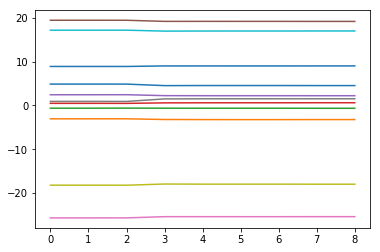

In [41]:
import matplotlib.pyplot as plt
plt.plot(chain.b)